In [1]:
import pandas as pd
import numpy as np
import random
import operator

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# data preparation for training models, model selection and splitting the data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [4]:
# data models to implement
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, NuSVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# data evaluation
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [6]:
orig_df = pd.read_csv(r'mushrooms.csv')
df = pd.read_csv(r'mushrooms.csv')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.shape

(8124, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [11]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [13]:
categories = df.select_dtypes(include = [object]).columns

In [14]:
for cat in categories:
    print(df[cat].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [15]:
def det_countplots(df, target, hues):
    fig, axes = plt.subplots(nrows = len(hues), ncols = 1, figsize = (10,100))
    for i, hue in enumerate(hues):
        sns.countplot(df[target], hue = df[hue], ax = axes[i])
        axes[i].legend(loc = 'best').set_title(hue)
    plt.tight_layout()
    plt.show()

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anac

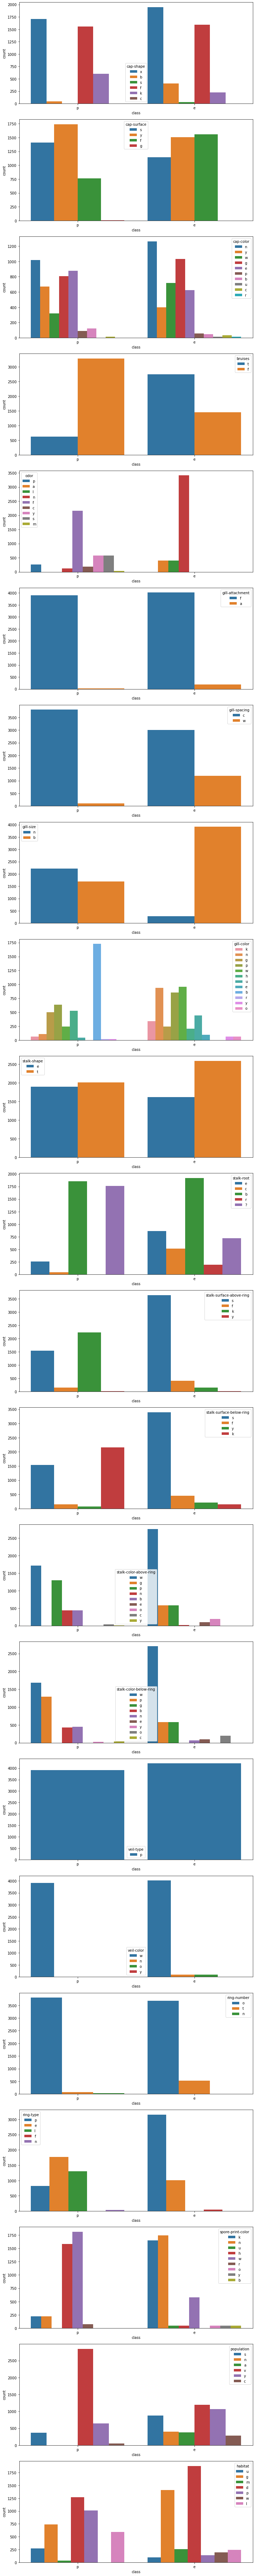

In [16]:
det_countplots(df, categories[0], categories[1:])

In [17]:
def countplots(df, variables):
    fig, axes = plt.subplots(nrows = len(variables), ncols = 1, figsize = (5,100))
    for i, var in enumerate(variables):
        pax = sns.countplot(df[var], ax = axes[i])
        for p, label in zip(pax.patches, sorted(df[var].value_counts())):
            pax.annotate(label, (p.get_x() + 0.375, p.get_height() ))
    plt.tight_layout()
    plt.show()

C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User2-NB\anac

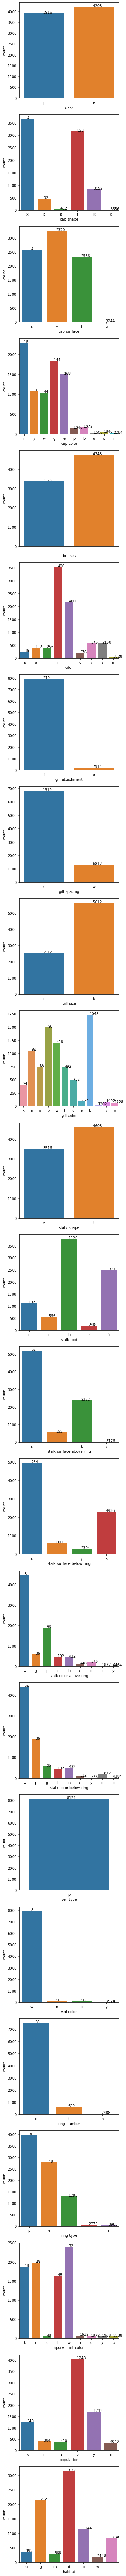

In [18]:
countplots(df, categories)

In [19]:
def pie(df, values):
    fig, axes = plt.subplots(nrows = len(values), ncols = 1, figsize = (20,100))
    for i, val in enumerate(values):
        rat = np.zeros(len(df[val].value_counts()))
        rat.fill(0.1)
        axes[i].pie(df[val].value_counts(), 
                    labels = df[val].value_counts().index,
                   autopct = "%1.2f%%",
                   explode = rat)
        axes[i].set_title(val)
    plt.tight_layout()
    plt.show()

In [20]:
def label_encoder(df, col):
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
    return df

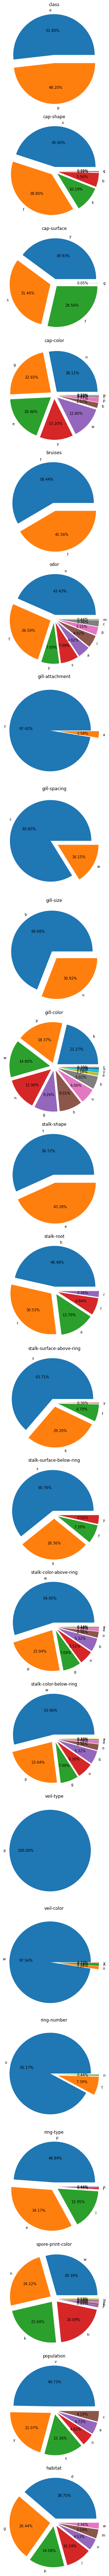

In [21]:
pie(df, categories)

In [22]:
def model_select(x, y, model, i):
    fs = SelectKBest(score_func=chi2, k=i)
    fs.fit(x, y)
    x_selected = fs.transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_selected, y, random_state=42, test_size=0.4)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return accuracy_score(y_pred, y_test)

In [23]:
def modelling(x, y, model, ml_name=None):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.4)
    y_pred = model.predict(x_test)
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
    score = accuracy_score(y_pred, y_test)
    plt.title(f'Confusion matrix using {ml_name}:\n{round(score*100,2)}%')

In [24]:
for i in df.columns:
    df = label_encoder(df, i)

In [25]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [26]:
fs = SelectKBest(score_func=chi2, k='all')

In [27]:
x = df.drop(['class'], axis=1)
y = df['class']

In [28]:
fs.fit(x, y)

SelectKBest(k='all', score_func=<function chi2 at 0x000000163C743700>)

In [29]:
scores = fs.scores_
scores = pd.DataFrame(scores, columns=['scores'])

In [30]:
cols = df.columns[1:]
scoring = pd.DataFrame(cols, columns=['specs'])

In [31]:
nscore = pd.concat([scoring, scores], axis=1)

In [32]:
nscore

,specs,scores
0,cap-shape,17.508364
1,cap-surface,214.068544
2,cap-color,11.511382
3,bruises,1194.277352
4,odor,75.910163
5,gill-attachment,3.505447
6,gill-spacing,826.795274
7,gill-size,1636.606833
8,gill-color,5957.764469
9,stalk-shape,36.594105


In [33]:
nscore.nlargest(10, 'scores')

,specs,scores
8,gill-color,5957.764469
18,ring-type,1950.610146
7,gill-size,1636.606833
3,bruises,1194.277352
10,stalk-root,1186.029221
6,gill-spacing,826.795274
21,habitat,751.309489
19,spore-print-color,379.132729
20,population,311.766736
11,stalk-surface-above-ring,222.982400


In [34]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()
gnb = GaussianNB()

In [35]:
cols = df.columns[1:]
models = [knn, dtc, rfc, svc, gnb]

In [36]:
x_feats = df.drop(['class'], axis=1)
y_feats = df['class']

<AxesSubplot:>

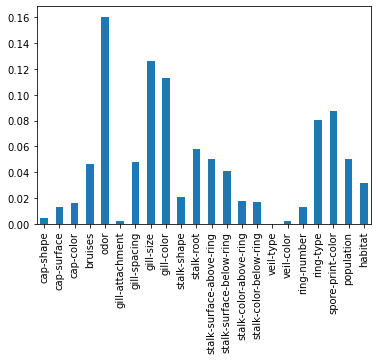

In [37]:
test_feats = rfc
test_feats.fit(x_feats, y_feats)
feats = test_feats.feature_importances_
important = pd.Series(feats, index=x_feats.columns)
important.plot.bar()

In [38]:
x = df.drop(['class'], axis=1).values
y = df['class'].values

In [39]:
feats = dict()
scr = []
for i in range(2, len(cols)+1):
    feat = f'{i} features'
    for ml in models:
        feat = i
        scr.append(model_select(x, y, ml, i))
    feats[feat] = np.mean(scr)

In [40]:
print("Max features for numerical input:")
best_one = max(feats.items(), key=operator.itemgetter(1))[0]
print(f"{best_one} with a mean score of:{feats[best_one]}")

Max features for numerical input:
22 with a mean score of:0.9595135531135531


In [41]:
best_one

22

In [42]:
fs1 = SelectKBest(score_func=chi2, k=best_one)
fs1.fit(x, y)
x_selected = fs1.transform(x)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, random_state=42, test_size=0.3)

In [44]:
c = [0.6503804749465018,
 0.9417009941298717,
 0.5616518695306818,
 0.594429737515684,
 0.23227518023099225,
 0.3193375984066925,
 0.0468172979184559,
 0.5293750146270392,
 0.2819430891359471,
 0.5268758291676598,
 0.14690203616712105,
 0.43397318641541704,
 0.7453481046128854,
 0.7405000287984094,
 0.7208880340977875]

In [45]:
knn_params = {
    'n_neighbors': range(1,31),
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute']
}
svc_params = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'gamma': ['scale'],
    'C': c
}
dtc_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [x for x in range(10)]
}
rfc_params = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [x for x in range(10)]
}

In [46]:
grid_knn = GridSearchCV(knn,
                       param_grid=knn_params,
                       scoring='accuracy',
                       cv = 10,
                       verbose = 1)
grid_svc = GridSearchCV(svc,
                       param_grid=svc_params,
                       scoring='accuracy',
                       cv = 10,
                       verbose = 1)
grid_dtc = GridSearchCV(dtc,
                       param_grid=dtc_params,
                       scoring='accuracy',
                       cv = 10,
                       verbose = 1)
grid_rfc = GridSearchCV(rfc,
                       param_grid=rfc_params,
                       scoring='accuracy',
                       cv = 10,
                       verbose = 1)

In [47]:
sl_knn = GridSearchCV(knn, param_grid=knn_params)
sl_svc = GridSearchCV(svc, param_grid=svc_params)
sl_dtc = GridSearchCV(dtc, param_grid=dtc_params)
sl_rfc = GridSearchCV(rfc, param_grid=rfc_params)
sl_gnb = GaussianNB()

In [48]:
import timeit
import time

In [49]:
grids = [grid_knn, grid_svc, grid_dtc, grid_rfc, gnb]
mls = [knn, svc, dtc, rfc, gnb]

In [50]:
for grid, ml in zip(grids, mls):
    start = time.time()
    grid.fit(x_train, y_train)
    end = time.time()
    print(f"Time required to train {ml} model: {end-start}")

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
Time required to train KNeighborsClassifier() model: 248.8395013809204
Fitting 10 folds for each of 60 candidates, totalling 600 fits
Time required to train SVC() model: 938.1528496742249
Fitting 10 folds for each of 40 candidates, totalling 400 fits


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must b

Time required to train DecisionTreeClassifier() model: 2.432129383087158
Fitting 10 folds for each of 60 candidates, totalling 600 fits


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User2-NB\anaconda3\lib\

Time required to train RandomForestClassifier() model: 151.5469241142273
Time required to train GaussianNB() model: 0.0039865970611572266


In [51]:
for i in grids[:-1]:
    print(i.best_params_)

{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}
{'C': 0.9417009941298717, 'gamma': 'scale', 'kernel': 'poly'}
{'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


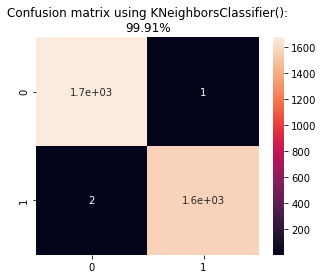

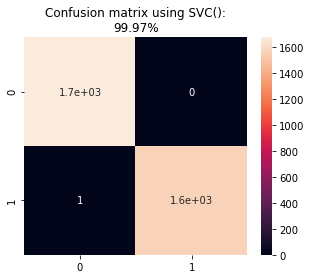

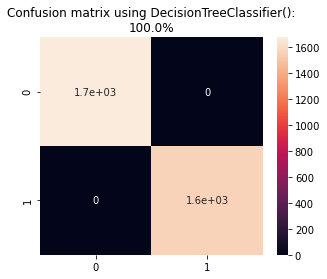

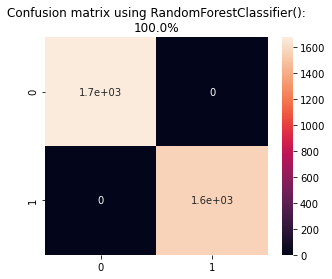

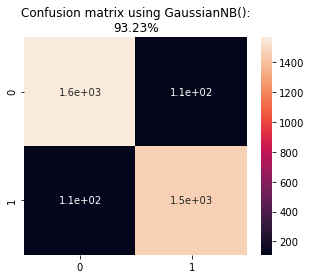

In [52]:
for grid, ml in zip(grids, mls):
    modelling(x_selected, y, grid, ml)

In [56]:
fs = SelectKBest(score_func=chi2, k=10)
fs.fit(x, y)
x_selected1 = fs.transform(x)

In [57]:
x1_train, x1_test, y_train, y_test = train_test_split(x_selected1, y, random_state=42, test_size=0.3)

In [58]:
grids_sl = [sl_knn, sl_svc, sl_dtc, sl_rfc, sl_gnb]
for grid, ml in zip(grids_sl, mls):
    start = time.time()
    grid.fit(x1_train, y_train)
    end = time.time()
    print(f"Time required to train {ml} model: {end-start}")

Time required to train KNeighborsClassifier() model: 109.39914441108704
Time required to train SVC() model: 264.8309791088104


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 306, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must b

Time required to train DecisionTreeClassifier() model: 0.9334368705749512


C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\User2-NB\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User2-NB\anaconda3\lib\

Time required to train RandomForestClassifier() model: 73.91053175926208
Time required to train GaussianNB() model: 0.003002643585205078


In [59]:
for i in grids_sl[:-1]:
    print(i.best_params_)

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
{'C': 0.9417009941298717, 'gamma': 'scale', 'kernel': 'poly'}
{'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


In [60]:
x_selected1.shape

(8124, 10)

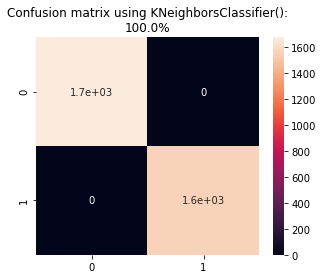

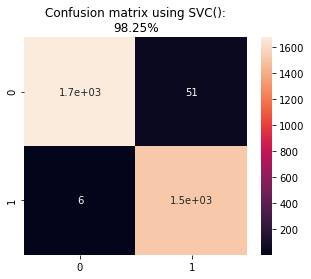

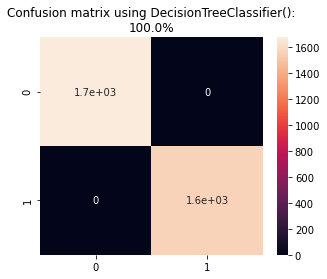

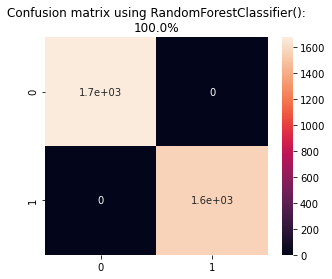

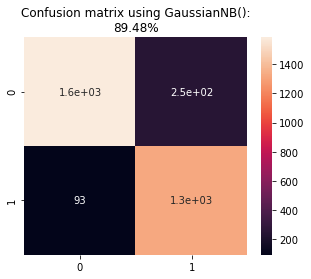

In [61]:
for grid, ml in zip(grids_sl, mls):
    modelling(x_selected1, y, grid, ml)

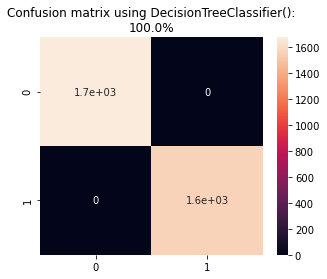

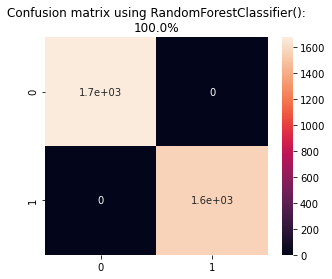

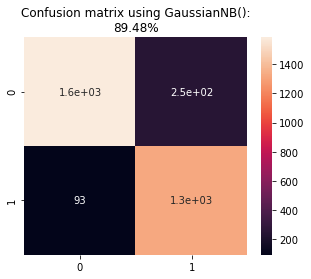

In [62]:
modelling(x_selected1, y, grids_sl[2], mls[2])
modelling(x_selected1, y, grids_sl[3], mls[3])
modelling(x_selected1, y, grids_sl[4], mls[4])

In [63]:
print(mls[2], " ", grids_sl[2].best_params_)
print(mls[3], " ", grids_sl[3].best_params_)
print(grids_sl[4], " with no params")

DecisionTreeClassifier()   {'criterion': 'gini', 'max_depth': 8, 'splitter': 'best'}
RandomForestClassifier()   {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}
GaussianNB()  with no params
